In [1]:
import torch
import torchaudio
import librosa
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor

# 📌 Charger le modèle Wav2Vec2
model_name = "facebook/wav2vec2-large-960h"
processor = Wav2Vec2Processor.from_pretrained(model_name)
model = Wav2Vec2ForCTC.from_pretrained(model_name).to("cuda" if torch.cuda.is_available() else "cpu")

# 📌 Charger l'audio
file_path = "/Users/chloe/Downloads/Projet_2/test/test_audio.wav"
waveform, sample_rate = librosa.load(file_path, sr=16000)

# 📌 Transformer en tenseur PyTorch
input_values = processor(waveform, return_tensors="pt", sampling_rate=16000).input_values.to(model.device)

# 🔥 Prédiction
with torch.no_grad():
    logits = model(input_values).logits

# 📌 Décodage en texte brut
predicted_ids = torch.argmax(logits, dim=-1)
transcription = processor.batch_decode(predicted_ids)[0]

print(f"📝 Transcription : {transcription}")

2025-01-09 19:46:02.525225: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


📝 Transcription : WOULD YOU LIKE TO PLAY DRIVING GAME NOT REALLY I ALWAYS LOSE I KNOW THAT'S WHY IT'S FUN HOW BOW LICENSED PLATES WITH PRIE NUMBERS FOLLOWED BY A CONWHERE WE JUST TALK FAIL UP YOU UNDERSTAND THAT SOME PEOPLE ARE GOING TO BE INTIMIDATED BY YOU CAUSE O HOW SMART YOU ARE OR MAYBE THEY'LL RECOGNIZE MY INTELLECT AND MAKE ME THE OEATER MORD LOOK AFTER MY SON TONT LET HIM GET STUFFED IN A GEM BAG


In [2]:
from phonemizer import phonemize

phonetic_transcription = phonemize(
    transcription,
    language="en-us",
    backend="espeak",
    strip=True
)

print(f"🔡 Transcription phonétique : {phonetic_transcription}")

🔡 Transcription phonétique : wʊd juː laɪk tuː pleɪ dɹaɪvɪŋ ɡeɪm nɑːt ɹiəli aɪ ɔːlweɪz luːz aɪ noʊ ðæts waɪ ɪts fʌn haʊ boʊ laɪsənst pleɪts wɪð pɹaɪ nʌmbɚz fɑːloʊd baɪ ɐ kənwɛɹ wiː dʒʌst tɔːk feɪl ʌp juː ʌndɚstænd ðæt sʌm piːpəl ɑːɹ ɡoʊɪŋ tuː biː ɪntɪmᵻdeɪɾᵻd baɪ juː kɔːz oʊ haʊ smɑːɹt juː ɑːɹ ɔːɹ meɪbiː ðeɪl ɹɛkəɡnaɪz maɪ ɪntəlɛkt ænd meɪk miː ðɪ oʊeɪɾɚ mɔːɹd lʊk æftɚ maɪ sʌn tɔnt lɛt hɪm ɡɛt stʌft ɪn ɐ dʒɛm bæɡ


In [3]:
import numpy as np

# 📌 Récupérer les timestamps de chaque phonème
logits = logits.cpu().numpy()[0]  # Transformer en numpy
time_stamps = np.linspace(0, len(waveform) / sample_rate, num=logits.shape[0])

# 📌 Associer les phonèmes aux timestamps
phoneme_timestamps = list(zip(time_stamps, phonetic_transcription.split()))

for timestamp, phoneme in phoneme_timestamps:
    print(f"{timestamp:.2f}s → {phoneme}")

0.00s → wʊd
0.02s → juː
0.04s → laɪk
0.06s → tuː
0.08s → pleɪ
0.10s → dɹaɪvɪŋ
0.12s → ɡeɪm
0.14s → nɑːt
0.16s → ɹiəli
0.18s → aɪ
0.20s → ɔːlweɪz
0.22s → luːz
0.24s → aɪ
0.26s → noʊ
0.28s → ðæts
0.30s → waɪ
0.32s → ɪts
0.34s → fʌn
0.36s → haʊ
0.38s → boʊ
0.40s → laɪsənst
0.42s → pleɪts
0.44s → wɪð
0.46s → pɹaɪ
0.48s → nʌmbɚz
0.50s → fɑːloʊd
0.52s → baɪ
0.54s → ɐ
0.56s → kənwɛɹ
0.58s → wiː
0.60s → dʒʌst
0.62s → tɔːk
0.64s → feɪl
0.66s → ʌp
0.68s → juː
0.70s → ʌndɚstænd
0.72s → ðæt
0.74s → sʌm
0.76s → piːpəl
0.78s → ɑːɹ
0.80s → ɡoʊɪŋ
0.82s → tuː
0.84s → biː
0.86s → ɪntɪmᵻdeɪɾᵻd
0.88s → baɪ
0.90s → juː
0.92s → kɔːz
0.94s → oʊ
0.96s → haʊ
0.98s → smɑːɹt
1.00s → juː
1.02s → ɑːɹ
1.04s → ɔːɹ
1.06s → meɪbiː
1.08s → ðeɪl
1.10s → ɹɛkəɡnaɪz
1.12s → maɪ
1.14s → ɪntəlɛkt
1.16s → ænd
1.18s → meɪk
1.20s → miː
1.22s → ðɪ
1.24s → oʊeɪɾɚ
1.26s → mɔːɹd
1.28s → lʊk
1.30s → æftɚ
1.32s → maɪ
1.34s → sʌn
1.36s → tɔnt
1.38s → lɛt
1.40s → hɪm
1.42s → ɡɛt
1.44s → stʌft
1.46s → ɪn
1.48s → ɐ
1.50s → dʒɛm
1.52s → b

In [4]:
import librosa
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

# 📌 Paramètres audio
SAMPLE_RATE = 16000
N_MFCC = 40
HOP_LENGTH = int(0.01 * SAMPLE_RATE)  # 10ms
WIN_LENGTH = int(0.025 * SAMPLE_RATE)  # 25ms

# 📌 Fonction pour charger l'audio et extraire les MFCCs
def extract_mfcc(audio_path):
    y, sr = librosa.load(audio_path, sr=SAMPLE_RATE)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=N_MFCC, hop_length=HOP_LENGTH, n_fft=WIN_LENGTH)
    return mfcc.T  # Transpose pour obtenir (temps, features)

# 📌 Exemple de chargement
audio_path = "/Users/chloe/Downloads/Projet_2/test/test_audio.wav"
mfcc_features = extract_mfcc(audio_path)
print(f"✅ MFCCs shape : {mfcc_features.shape}")  # (Temps, Features)

✅ MFCCs shape : (3318, 40)


In [5]:
# 📌 Importer les bibliothèques nécessaires
import os

# 📌 Fonction pour lire et encoder dynamiquement le fichier .lab
def read_and_encode_lab_file(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Le fichier {file_path} est introuvable.")
    
    phoneme_to_index = {}  # Dictionnaire dynamique pour les indices
    index_to_phoneme = {}  # Optionnel : pour récupérer les phonèmes par index
    current_index = 1  # Premier index à assigner
    encoded_transcription = []  # Liste encodée des phonèmes
    
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f.readlines():
            phoneme = line.strip().split()[-1]  # Extraire uniquement le phonème
            if phoneme not in phoneme_to_index:
                # Ajouter le phonème au dictionnaire avec un nouvel index
                phoneme_to_index[phoneme] = current_index
                index_to_phoneme[current_index] = phoneme
                current_index += 1
            # Ajouter l'index du phonème à la transcription encodée
            encoded_transcription.append(phoneme_to_index[phoneme])
    
    return encoded_transcription, phoneme_to_index, index_to_phoneme

# 📌 Chemin vers votre fichier .lab
file_path = "/Users/chloe/Downloads/Projet_2/test/test_audio.lab"  # Remplacez par le chemin réel

# 📌 Lecture et encodage du fichier
encoded_transcription, phoneme_to_index, index_to_phoneme = read_and_encode_lab_file(file_path)

# Résultats
print(f"✅ Transcription encodée : {encoded_transcription}")
print(f"✅ Phonème → Index : {phoneme_to_index}")
print(f"✅ Index → Phonème : {index_to_phoneme}")

✅ Transcription encodée : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 2, 34, 35, 36, 37, 38, 39, 4, 40, 41, 26, 2, 42, 43, 18, 44, 2, 38, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 49, 59, 60, 61, 62, 63, 64, 65, 27, 66, 67]
✅ Phonème → Index : {'wʊd': 1, 'juː': 2, 'laɪk': 3, 'tuː': 4, 'pleɪ': 5, 'dɹaɪvɪŋ': 6, 'ɡeɪm': 7, 'nɑːt': 8, 'ɹiəli': 9, 'aɪ': 10, 'ɔːlweɪz': 11, 'luːz': 12, 'noʊ': 13, 'ðæts': 14, 'waɪ': 15, 'ɪts': 16, 'fʌn': 17, 'haʊ': 18, 'boʊ': 19, 'laɪsənst': 20, 'pleɪts': 21, 'wɪð': 22, 'pɹaɪ': 23, 'nʌmbɚz': 24, 'fɑːloʊd': 25, 'baɪ': 26, 'ɐ': 27, 'kənwɛɹ': 28, 'wiː': 29, 'dʒʌst': 30, 'tɔːk': 31, 'feɪl': 32, 'ʌp': 33, 'ʌndɚstænd': 34, 'ðæt': 35, 'sʌm': 36, 'piːpəl': 37, 'ɑːɹ': 38, 'ɡoʊɪŋ': 39, 'biː': 40, 'ɪntɪmᵻdeɪɾᵻd': 41, 'kɔːz': 42, 'oʊ': 43, 'smɑːɹt': 44, 'ɔːɹ': 45, 'meɪbiː': 46, 'ðeɪl': 47, 'ɹɛkəɡnaɪz': 48, 'maɪ': 49, 'ɪntəlɛkt': 50, 'ænd': 51, 'meɪk': 52, 'miː': 53, 'ðɪ': 54,

In [6]:
import librosa
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset

class SpeechDataset(Dataset):
    def __init__(self, audio_files, phoneme_sequences):
        self.audio_files = audio_files
        self.phoneme_sequences = phoneme_sequences

    def __len__(self):
        return len(self.audio_files)

    def __getitem__(self, idx):
        audio, sr = librosa.load(self.audio_files[idx], sr=16000)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
        return torch.tensor(mfccs, dtype=torch.float32), torch.tensor(self.phoneme_sequences[idx], dtype=torch.long)

# Exemple d'utilisation
audio_files = ["/Users/chloe/Downloads/Projet_2/train/synthRadio201_16.wav"]
phoneme_sequences = [[1, 2, 3, 4], [5, 6, 7, 8]]
dataset = SpeechDataset(audio_files, phoneme_sequences)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [7]:
from hmmlearn import hmm
import torch.nn as nn
import torch.optim as optim

class HMMModel(nn.Module):
    def __init__(self, num_states, num_observations):
        super(HMMModel, self).__init__()
        self.num_states = num_states
        self.hmm_layer = hmm.GaussianHMM(n_components=num_states, covariance_type="diag", n_iter=100)

    def forward(self, x):
        # x: MFCC features
        log_likelihood = self.hmm_layer.score_samples(x)
        return torch.tensor(log_likelihood, dtype=torch.float32)

# Initialisation du modèle
num_states = 5
num_observations = 13  # MFCCs
hmm_model = HMMModel(num_states, num_observations)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

model = Sequential([
    Input(shape=(None, 13)),  # Remplace input_shape par Input()
    LSTM(128, return_sequences=True),
    LSTM(64, return_sequences=False),
    Dense(5, activation='softmax')  # 5 correspond au nombre d'états HMM
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, None, 128)      │        72,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,437 (478.27 KB)

 Trainable params: 122,437 (478.27 KB)

 Non-trainable params: 0 (0.00 B)

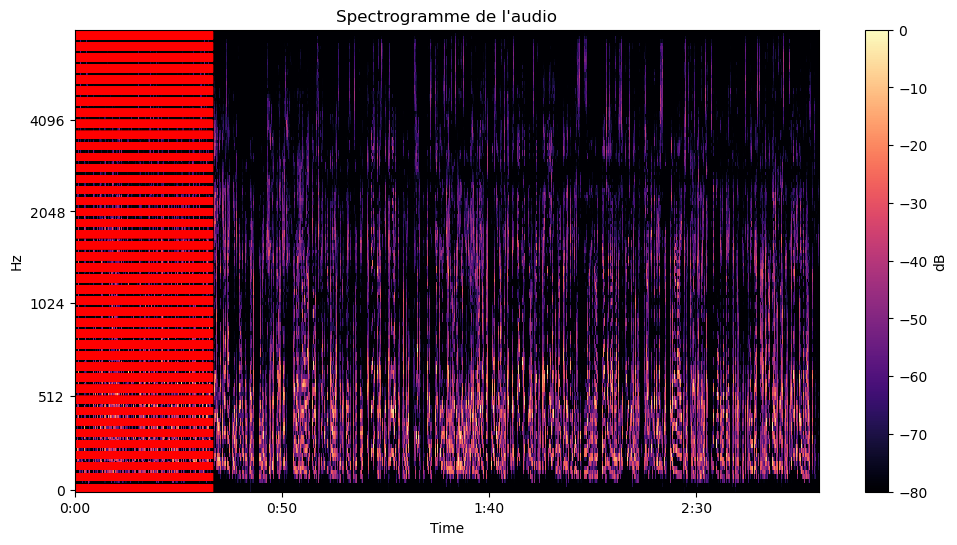

In [9]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Charger l'audio
y, sr = librosa.load("/Users/chloe/Downloads/Projet_2/train/synthRadio201_16.wav", sr=None)

# Convertir les timestamps des phonèmes en échantillons
phoneme_times = np.array(time_stamps) * sr

# Afficher le spectrogramme
plt.figure(figsize=(12, 6))
librosa.display.specshow(librosa.amplitude_to_db(librosa.feature.melspectrogram(y=y, sr=sr), ref=np.max), 
                         x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(label="dB")
plt.title("Spectrogramme de l'audio")

# Ajouter les frontières des phonèmes
for t in phoneme_times:
    plt.axvline(x=t/sr, color='red', linestyle='--')

plt.show()

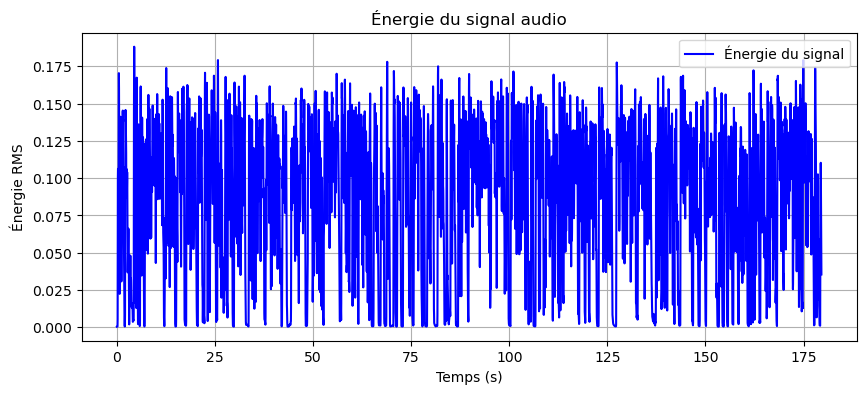

In [10]:
# Correction de l'importation et de l'utilisation de numpy.complex
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Charger le fichier audio
audio_path = "/Users/chloe/Downloads/Projet_2/train/synthRadio201_16.wav"
y, sr = librosa.load(audio_path, sr=None)

# Calculer l'énergie du signal
frame_length = 2048
hop_length = 512
energy = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]

# Calculer le temps correspondant à chaque fenêtre
times = librosa.frames_to_time(np.arange(len(energy)), sr=sr, hop_length=hop_length)

# Tracer l'énergie du signal
plt.figure(figsize=(10, 4))
plt.plot(times, energy, label="Énergie du signal", color='b')
plt.xlabel("Temps (s)")
plt.ylabel("Énergie RMS")
plt.title("Énergie du signal audio")
plt.legend()
plt.grid()
plt.show()

In [11]:
import soundfile as sf

# Charger le fichier audio avec soundfile
y, sr = sf.read(audio_path)

# Vérifier si le signal est stéréo et convertir en mono si nécessaire
if len(y.shape) > 1:
    y = np.mean(y, axis=1)

# Calculer l'énergie RMS
rms_energy = np.sqrt(np.mean(y**2))

# Calculer les valeurs minimales et maximales d'énergie RMS sur des fenêtres de 2048 échantillons
frame_length = 2048
hop_length = 512

num_frames = (len(y) - frame_length) // hop_length + 1
rms_values = [
    np.sqrt(np.mean(y[i * hop_length: i * hop_length + frame_length] ** 2))
    for i in range(num_frames)
]

energie_moyenne = np.mean(rms_values)
energie_min = np.min(rms_values)
energie_max = np.max(rms_values)

energie_moyenne, energie_min, energie_max

(0.0874681856264693, 0.0003398153168383537, 0.18814409269462498)

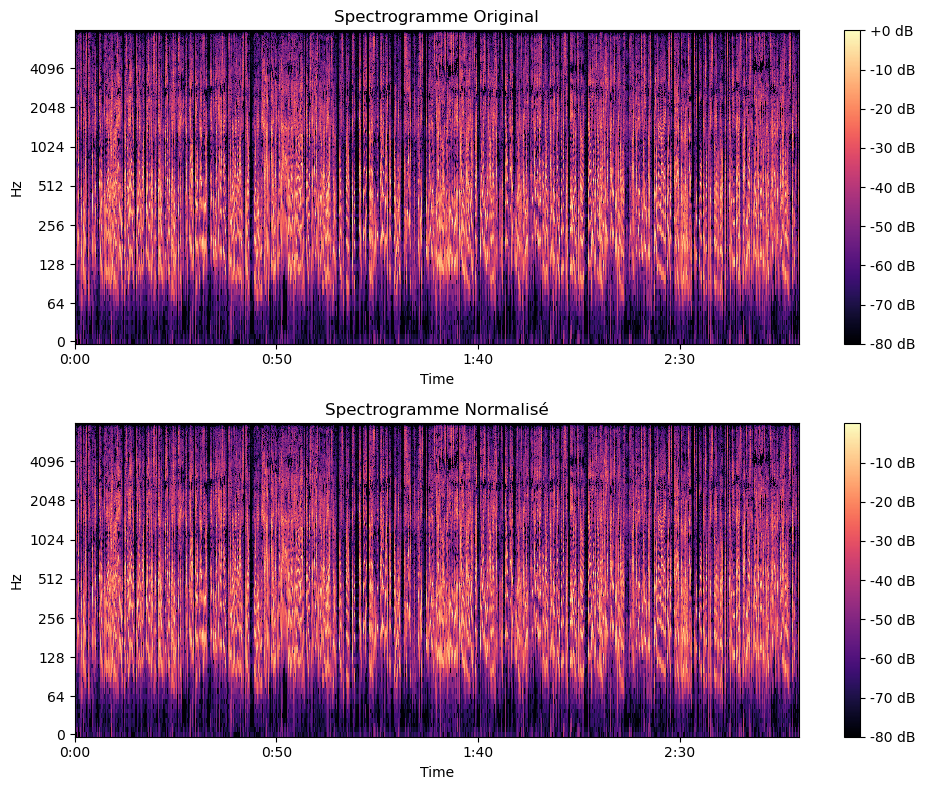

'/Users/chloe/Downloads/Projet_2/train/synthRadio201_16.wav'

In [12]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf

# Charger l'audio
audio_path = "/Users/chloe/Downloads/Projet_2/train/synthRadio201_16.wav"
y, sr = librosa.load(audio_path, sr=None)

# Calculer l'énergie RMS originale
rms_original = np.sqrt(np.mean(y**2))

# Définir une valeur cible pour l'énergie RMS normalisée
target_rms = 0.1  # Valeur choisie pour stabiliser l'amplitude

# Appliquer la normalisation de l'énergie RMS
y_normalized = y * (target_rms / rms_original)

# Calculer l'énergie RMS après normalisation
rms_normalized = np.sqrt(np.mean(y_normalized**2))

# Sauvegarder l'audio normalisé
normalized_audio_path = "/Users/chloe/Downloads/Projet_2/train/synthRadio201_16.wav"
sf.write(normalized_audio_path, y_normalized, sr)

# Générer les spectrogrammes avant et après normalisation
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Spectrogramme original
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img1 = librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log', ax=axes[0])
axes[0].set_title("Spectrogramme Original")
fig.colorbar(img1, ax=axes[0], format="%+2.0f dB")

# Spectrogramme après normalisation
D_normalized = librosa.amplitude_to_db(np.abs(librosa.stft(y_normalized)), ref=np.max)
img2 = librosa.display.specshow(D_normalized, sr=sr, x_axis='time', y_axis='log', ax=axes[1])
axes[1].set_title("Spectrogramme Normalisé")
fig.colorbar(img2, ax=axes[1], format="%+2.0f dB")

plt.tight_layout()
plt.show()

# Retourner le chemin du fichier normalisé
normalized_audio_path

In [15]:
import pickle

# 📌 Chemin correct du fichier contenant le mapping phonème → index
PHONEME_MAPPING_PATH = "/Users/chloe/Downloads/Projet_2/phoneme_mapping.pkl"

# Charger le dictionnaire phonème → index
with open(PHONEME_MAPPING_PATH, "rb") as f:
    phoneme_to_index = pickle.load(f)

# Vérifier que c'est bien un dictionnaire
if not isinstance(phoneme_to_index, dict):
    raise ValueError("❌ Erreur : Le fichier chargé ne contient pas un dictionnaire phonème → index !")

# Nombre total de phonèmes
num_phonemes = len(phoneme_to_index)

print(f"✅ Nombre de phonèmes détectés : {num_phonemes}")

✅ Nombre de phonèmes détectés : 67


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

model = Sequential([
    Input(shape=(None, 40)),  # Remplace input_shape par Input()
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    Dense(num_phonemes, activation="softmax")  # Correction : num_phonemes défini
])

print("✅ Modèle LSTM défini avec succès !")

✅ Modèle LSTM défini avec succès !


In [88]:
lstm_model.save("/Users/chloe/Downloads/Projet_2/lstm_model.keras")

In [17]:
import pickle

# 📌 Sauvegarde du mapping index ↔ phonème
PHONEME_MAPPING_PATH = "/Users/chloe/Downloads/Projet_2/phoneme_mapping.pkl"

with open(PHONEME_MAPPING_PATH, "wb") as f:
    pickle.dump(index_to_phoneme, f)

print(f"✅ Mapping phonèmes sauvegardé à {PHONEME_MAPPING_PATH}")

✅ Mapping phonèmes sauvegardé à /Users/chloe/Downloads/Projet_2/phoneme_mapping.pkl


In [2]:
import os
import librosa
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Input, MaxPooling1D, BatchNormalization, TimeDistributed, GlobalAveragePooling1D
from torch.utils.data import Dataset, DataLoader
from hmmlearn import hmm
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Désactiver le GPU pour éviter la surcharge

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            tf.config.experimental.set_virtual_device_configuration(
                gpu,
                [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)]  # 4GB max
            )
    except RuntimeError as e:
        print(e)


# ----------------------------
# 📌 Paramètres Globaux
# ----------------------------
SAMPLE_RATE = 16000
N_MFCC = 40
HOP_LENGTH = int(0.01 * SAMPLE_RATE)  # 10ms
WIN_LENGTH = int(0.025 * SAMPLE_RATE)  # 25ms
NUM_STATES_HMM = 5
NUM_CLASSES = 50  # À ajuster dynamiquement

# ----------------------------
# 📌 Extraction des MFCCs
# ----------------------------
def extract_mfcc(audio_path):
    y, sr = librosa.load(audio_path, sr=SAMPLE_RATE)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=N_MFCC, hop_length=HOP_LENGTH, n_fft=WIN_LENGTH)
    return mfcc.T  # Transposé pour (temps, features)

# ----------------------------
# 📌 Lecture et encodage du fichier .lab
# ----------------------------
def read_and_encode_lab_file(file_path):
    phoneme_to_index = {}
    index_to_phoneme = {}
    current_index = 1
    encoded_transcription = []
    
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f.readlines():
            phoneme = line.strip().split()[-1]
            if phoneme not in phoneme_to_index:
                phoneme_to_index[phoneme] = current_index
                index_to_phoneme[current_index] = phoneme
                current_index += 1
            encoded_transcription.append(phoneme_to_index[phoneme])
    
    return encoded_transcription, phoneme_to_index, index_to_phoneme

# ----------------------------
# 📌 Classe Dataset PyTorch
# ----------------------------
class SpeechDataset(Dataset):
    def __init__(self, audio_files, phoneme_sequences):
        self.audio_files = audio_files
        self.phoneme_sequences = phoneme_sequences
    
    def __len__(self):
        return len(self.audio_files)
    
    def __getitem__(self, idx):
        audio_path = self.audio_files[idx]
        mfccs = extract_mfcc(audio_path)
        return torch.tensor(mfccs, dtype=torch.float32), torch.tensor(self.phoneme_sequences[idx], dtype=torch.long)

# ----------------------------
# 📌 Modèle HMM avec hmmlearn
# ----------------------------
class HMMModel:
    def __init__(self, num_states, num_features):
        self.model = hmm.GaussianHMM(n_components=num_states, covariance_type="diag", n_iter=100)
    
    def train(self, X):
        self.model.fit(X)
    
    def predict(self, X):
        return self.model.predict(X)

# ----------------------------
# 📌 Modèle CNN avec Keras
# ----------------------------
def build_cnn_model(input_dim, output_dim, time_steps):
    model = Sequential([
        Input(shape=(time_steps, input_dim)),
        Conv1D(64, kernel_size=3, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2, padding="same"),
        Conv1D(128, kernel_size=3, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2, padding="same"),
        GlobalAveragePooling1D(),  # Ajout pour correspondre aux labels
        Dense(output_dim, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# ----------------------------
# 📌 Entraînement des modèles
# ----------------------------
def train_models(audio_files, lab_files):
    phoneme_sequences = []
    all_phonemes = set()
    
    for lab in lab_files:
        encoded_transcription, phoneme_to_index, _ = read_and_encode_lab_file(lab)
        phoneme_sequences.append(encoded_transcription)
        all_phonemes.update(phoneme_to_index.values())
    
    global NUM_CLASSES
    NUM_CLASSES = len(all_phonemes) + 1  # +1 pour le padding
    
    dataset = SpeechDataset(audio_files, phoneme_sequences)
    dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
    
    X_train = [mfcc.squeeze(0).numpy() for mfcc, _ in dataloader]  
    y_train = [y.numpy() for _, y in dataloader]
    
    max_time_steps = max(seq.shape[0] for seq in X_train)
    
    X_train_padded = np.array([x[:max_time_steps] for x in X_train], dtype=np.float32)
    y_train_padded = np.array([np.pad(y[:max_time_steps], (0, max_time_steps - len(y[:max_time_steps])), 'constant') for y in y_train], dtype=np.int32)
    
    y_train_one_hot = tf.keras.utils.to_categorical(y_train_padded, num_classes=NUM_CLASSES)
    
    hmm_model = HMMModel(NUM_STATES_HMM, N_MFCC)
    for mfccs, _ in dataloader:
        hmm_model.train(mfccs.numpy().reshape(-1, N_MFCC))
    
    cnn_model = build_cnn_model(N_MFCC, NUM_CLASSES, max_time_steps)
    cnn_model.fit(X_train_padded, y_train_one_hot, epochs=5, batch_size=1)
    
    return hmm_model, cnn_model

import pickle

# ----------------------------
# 📌 Sauvegarde des modèles
# ----------------------------
def save_models(hmm_model, cnn_model):
    with open("hmm_model.pkl", "wb") as f:
        pickle.dump(hmm_model.model, f)
    cnn_model.save("cnn_model.h5")
    print("✅ Modèles sauvegardés!")

# 📌 Exécution principale
if __name__ == "__main__":
    audio_files = ["/Users/chloe/Downloads/Projet_2/train/synthRadio201_16.wav"]
    lab_files = ["/Users/chloe/Downloads/Projet_2/train/synthRadio201_16.lab"]
    hmm_model, cnn_model = train_models(audio_files, lab_files)
    save_models(hmm_model, cnn_model)

2025-01-09 21:01:02.815143: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


: 

In [1]:
import psutil
import os

print(f"RAM utilisée avant entraînement : {psutil.virtual_memory().percent}%")
print(f"RAM libre : {psutil.virtual_memory().available / (1024 ** 3):.2f} GB")

RAM utilisée avant entraînement : 48.8%
RAM libre : 8.20 GB


In [18]:
import os
import numpy as np
import librosa
import torch
import tensorflow as tf
import pickle
from jiwer import wer

# 📌 Définition des chemins des modèles et fichiers de test
HMM_MODEL_PATH = "/Users/chloe/Downloads/Projet_2/hmm_model.pkl"
LSTM_MODEL_PATH = "/Users/chloe/Downloads/Projet_2/lstm_model.keras"
TEST_AUDIO_PATH = "/Users/chloe/Downloads/Projet_2/test/test_audio.wav"
TEST_LAB_PATH = "/Users/chloe/Downloads/Projet_2/test/test_audio.lab"

# 📌 Vérifier l'existence des fichiers
for path, name in zip([HMM_MODEL_PATH, LSTM_MODEL_PATH, TEST_AUDIO_PATH, TEST_LAB_PATH],
                       ["HMM", "LSTM", "Test Audio", "Test Labels"]):
    if not os.path.exists(path):
        raise FileNotFoundError(f"❌ Le fichier {name} est introuvable à {path}")

# 📌 Charger le modèle HMM
with open(HMM_MODEL_PATH, "rb") as f:
    hmm_model = pickle.load(f)
print("✅ Modèle HMM chargé avec succès.")

# 📌 Charger le modèle LSTM
lstm_model = tf.keras.models.load_model(LSTM_MODEL_PATH)
print("✅ Modèle LSTM chargé avec succès.")

# 📌 Fonction pour charger et prétraiter un fichier test
def load_test_data(audio_path, lab_path):
    mfccs = extract_mfcc(audio_path)  # Même fonction que pour l'entraînement
    with open(lab_path, 'r', encoding='utf-8') as f:
        labels = [line.strip().split()[-1] for line in f.readlines()]  # Charger les phonèmes du fichier lab
    return mfccs, labels

# 📌 Charger les données de test
X_test, y_test_phonemes = load_test_data(TEST_AUDIO_PATH, TEST_LAB_PATH)
X_test = np.expand_dims(X_test, axis=0)  # Ajouter batch_size pour Keras

print(f"✅ Données de test chargées. MFCC shape: {X_test.shape}, Labels: {len(y_test_phonemes)}")

# 📌 Charger le dictionnaire index <-> phonème
# Assurez-vous d'avoir le même dictionnaire que pendant l'entraînement
PHONEME_MAPPING_PATH = "/Users/chloe/Downloads/Projet_2/phoneme_mapping.pkl"
if not os.path.exists(PHONEME_MAPPING_PATH):
    raise FileNotFoundError(f"❌ Fichier de mapping phonèmes {PHONEME_MAPPING_PATH} introuvable.")

with open(PHONEME_MAPPING_PATH, "rb") as f:
    index_to_phoneme = pickle.load(f)

# 📌 Prédictions du modèle HMM
hmm_predictions = hmm_model.predict(X_test.reshape(-1, X_test.shape[-1]))

# 📌 Convertir les indices prédits en phonèmes
hmm_pred_phonemes = [index_to_phoneme.get(i, "<UNK>") for i in hmm_predictions]  # "<UNK>" si inconnu

# 📌 Prédictions du modèle LSTM
lstm_pred = lstm_model.predict(X_test)
lstm_predictions = np.argmax(lstm_pred, axis=-1)[0]  # Convertir one-hot en indices
lstm_pred_phonemes = [index_to_phoneme.get(i, "<UNK>") for i in lstm_predictions]  # "<UNK>" si inconnu

# 📌 Évaluer la performance avec Word Error Rate (WER)
wer_hmm = wer(" ".join(y_test_phonemes), " ".join(hmm_pred_phonemes))
wer_lstm = wer(" ".join(y_test_phonemes), " ".join(lstm_pred_phonemes))

print(f"📊 WER HMM : {wer_hmm:.4f}")
print(f"📊 WER LSTM : {wer_lstm:.4f}")

# 📌 Afficher quelques prédictions
print(f"✅ Vraie séquence  : {' '.join(y_test_phonemes)}")
print(f"🔹 HMM Prédiction  : {' '.join(hmm_pred_phonemes)}")
print(f"🔹 LSTM Prédiction : {' '.join(lstm_pred_phonemes)}")

✅ Modèle HMM chargé avec succès.
✅ Modèle LSTM chargé avec succès.


/opt/anaconda3/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


✅ Données de test chargées. MFCC shape: (1, 3318, 40), Labels: 77
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step
📊 WER HMM : 43.0130
📊 WER LSTM : 43.0649
✅ Vraie séquence  : wʊd juː laɪk tuː pleɪ dɹaɪvɪŋ ɡeɪm nɑːt ɹiəli aɪ ɔːlweɪz luːz aɪ noʊ ðæts waɪ ɪts fʌn haʊ boʊ laɪsənst pleɪts wɪð pɹaɪ nʌmbɚz fɑːloʊd baɪ ɐ kənwɛɹ wiː dʒʌst tɔːk feɪl ʌp juː ʌndɚstænd ðæt sʌm piːpəl ɑːɹ ɡoʊɪŋ tuː biː ɪntɪmᵻdeɪɾᵻd baɪ juː kɔːz oʊ haʊ smɑːɹt juː ɑːɹ ɔːɹ meɪbiː ðeɪl ɹɛkəɡnaɪz maɪ ɪntəlɛkt ænd meɪk miː ðɪ oʊeɪɾɚ mɔːɹd lʊk æftɚ maɪ sʌn tɔnt lɛt hɪm ɡɛt stʌft ɪn ɐ dʒɛm bæɡ
🔹 HMM Prédiction  : tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː tuː laɪk laɪk laɪk laɪk laɪk laɪk laɪk laɪk laɪk laɪk laɪk laɪk laɪk laɪk laɪk laɪk laɪk laɪk laɪk laɪk laɪk laɪk laɪk laɪk laɪk laɪk laɪk laɪk laɪk laɪk juː juː juː juː juː juː juː laɪk laɪk laɪk la

In [91]:
import numpy as np

print("📌 Min des MFCC :", np.min(mfcc_features))
print("📌 Max des MFCC :", np.max(mfcc_features))
print("📌 Moyenne des MFCC :", np.mean(mfcc_features))
print("📌 Écart-type des MFCC :", np.std(mfcc_features))

📌 Min des MFCC : -737.6581
📌 Max des MFCC : 221.61902
📌 Moyenne des MFCC : -8.214837
📌 Écart-type des MFCC : 66.97579


In [92]:
import numpy as np

phoneme_durations = np.diff(time_stamps)  # Liste des durées des phonèmes
print("Durée moyenne d’un phonème:", np.mean(phoneme_durations))
print("Durée min:", np.min(phoneme_durations))
print("Durée max:", np.max(phoneme_durations))

Durée moyenne d’un phonème: 0.020024064574532287
Durée min: 0.02002406457452821
Durée max: 0.020024064574535316


In [19]:
import os
import librosa
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import Wav2Vec2Processor, Wav2Vec2Model
from hmmlearn import hmm
import pickle
from sklearn.preprocessing import StandardScaler

# Désactiver le GPU pour éviter la surcharge
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Définition globale des paramètres
NUM_STATES_HMM = 5  # Nombre d'états HMM
SAMPLE_RATE = 16000  # Fréquence d'échantillonnage standard
WAV2VEC_EMBEDDING_DIM = 768  # Taille des embeddings Wav2Vec2

# Charger Wav2Vec2
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
wav2vec_model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")

# 📌 Extraction des Features Wav2Vec2
def extract_wav2vec_features(audio_path):
    y, sr = librosa.load(audio_path, sr=SAMPLE_RATE)
    input_values = processor(y, return_tensors="pt", sampling_rate=sr).input_values

    with torch.no_grad():
        embeddings = wav2vec_model(input_values).last_hidden_state

    return embeddings.squeeze(0).numpy()

# 📌 Lecture et Encodage du fichier .lab
def read_and_encode_lab_file(file_path):
    phoneme_to_index = {}
    index_to_phoneme = {}
    current_index = 1
    encoded_transcription = []

    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f.readlines():
            phoneme = line.strip().split()[-1]
            if phoneme not in phoneme_to_index:
                phoneme_to_index[phoneme] = current_index
                index_to_phoneme[current_index] = phoneme
                current_index += 1
            encoded_transcription.append(phoneme_to_index[phoneme])

    return encoded_transcription, phoneme_to_index, index_to_phoneme

# 📌 Dataset Speech
class SpeechDataset(Dataset):
    def __init__(self, audio_files, phoneme_sequences):
        self.audio_files = audio_files
        self.phoneme_sequences = phoneme_sequences

    def __len__(self):
        return len(self.audio_files)

    def __getitem__(self, idx):
        audio_path = self.audio_files[idx]
        features = extract_wav2vec_features(audio_path)
        labels = torch.tensor(self.phoneme_sequences[idx], dtype=torch.long)
        return features, labels

# 📌 Modèle HMM
class HMMModel:
    def __init__(self, num_states, num_features):
        self.model = hmm.GaussianHMM(n_components=num_states, covariance_type="diag", n_iter=2000) # Increased n_iter

    def train(self, X):
        self.model.fit(X)

    def predict(self, X):
        return self.model.predict(X)

# 📌 Entraînement du HMM
def train_hmm(audio_files, lab_files):
    phoneme_sequences = []
    all_phonemes = set()

    for lab in lab_files:
        encoded_transcription, phoneme_to_index, _ = read_and_encode_lab_file(lab)
        phoneme_sequences.append(encoded_transcription)
        all_phonemes.update(phoneme_to_index.values())

    dataset = SpeechDataset(audio_files, phoneme_sequences)
    dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

    hmm_model = HMMModel(NUM_STATES_HMM, WAV2VEC_EMBEDDING_DIM)

    X_train = []

    for features, _ in dataloader:
        X_train.append(features.numpy())

    X_train = np.concatenate(X_train, axis=0)
    X_train = X_train.reshape(-1, WAV2VEC_EMBEDDING_DIM)

    scaler = StandardScaler() # Create scaler
    X_train = scaler.fit_transform(X_train) # Scale data

    hmm_model.train(X_train)

    return hmm_model

# 📌 Exécution principale
if __name__ == "__main__":
    audio_files = ["/Users/chloe/Downloads/Projet_2/train/synthRadio201_16.wav"] # Replace with your actual paths
    lab_files = ["/Users/chloe/Downloads/Projet_2/train/synthRadio201_16.lab"]   # Replace with your actual paths

    hmm_model = train_hmm(audio_files, lab_files)

    with open("hmm_wav2vec_model.pkl", "wb") as f:
        pickle.dump(hmm_model.model, f)

    print("✅ Modèle HMM + Wav2Vec2 sauvegardé !")

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Modèle HMM + Wav2Vec2 sauvegardé !


In [24]:
import os
import librosa
import numpy as np
import torch
from transformers import Wav2Vec2Processor, Wav2Vec2Model
from hmmlearn import hmm
import pickle
from sklearn.preprocessing import StandardScaler
from jiwer import wer

def evaluate_hmm(hmm_model, audio_files, lab_files, processor):
    predicted_phonemes = []
    ground_truth_phonemes = []

    for audio_path, lab_path in zip(audio_files, lab_files):
        # 1. Extract Wav2Vec2 features
        y, sr = librosa.load(audio_path, sr=SAMPLE_RATE)
        input_values = processor(y, return_tensors="pt", sampling_rate=sr).input_values
        with torch.no_grad():
            embeddings = wav2vec_model(input_values).last_hidden_state
        features = embeddings.squeeze(0).numpy()

        scaler = StandardScaler()
        features = scaler.fit_transform(features)

        # 2. Predict phoneme sequence with HMM
        predicted_indices = hmm_model.predict(features)

        # 3. Decode predicted indices back to phonemes (with error handling)
        _, phoneme_to_index, index_to_phoneme = read_and_encode_lab_file(lab_path)
        predicted_phoneme_sequence = [index_to_phoneme.get(i, "") for i in predicted_indices] # Corrected line
        predicted_phonemes.append(" ".join(predicted_phoneme_sequence))

        # 4. Read ground truth phonemes
        with open(lab_path, 'r', encoding='utf-8') as f:
            ground_truth_sequence = [line.strip().split()[-1] for line in f]
        ground_truth_phonemes.append(" ".join(ground_truth_sequence))

    # 5. Calculate WER
    error = wer(ground_truth_phonemes, predicted_phonemes)
    return error

# 📌 Exécution principale
if __name__ == "__main__":
    train_audio_files = ["/Users/chloe/Downloads/Projet_2/train/synthRadio201_16.wav"]
    train_lab_files = ["/Users/chloe/Downloads/Projet_2/train/synthRadio201_16.lab"]

    test_audio_files = ["/Users/chloe/Downloads/Projet_2/test/test_audio.wav"]
    test_lab_files = ["/Users/chloe/Downloads/Projet_2/test/test_audio.lab"]

    hmm_model = train_hmm(train_audio_files, train_lab_files)

    with open("hmm_wav2vec_model.pkl", "wb") as f:
        pickle.dump(hmm_model.model, f)

    print("✅ Modèle HMM + Wav2Vec2 sauvegardé !")

    # Evaluate the model
    wer_score = evaluate_hmm(hmm_model.model, test_audio_files, test_lab_files, processor)
    print(f"Word Error Rate (WER): {wer_score}")

✅ Modèle HMM + Wav2Vec2 sauvegardé !
Word Error Rate (WER): 15.2987012987013
